# NLP & Sentiment Analysis.

En esta etapa del proyecto manejaremos diferentes modelos pre-entrenados (librerías) y trataremos de evaluar cuál es el que nos ofrece mejores resultados.

Evidentemente, sería conveniente desarrollar un modelo propio ad-hoc según las necesidades particulares del proyecto, lo cual probablemente nos permita alcanzar resultados más precisos. Sin embargo, no debemos olvidar que por el momento pretendemos construir las bases del proyecto y obtener un mínimo producto viable que demuestre su potencial. Disponemos de muy poco tiempo como para desarrollar y entrenar nuestro propio modelo y es por eso que se opta por la utilización de modelos pre-entrenados de NLP a la hora de analizar el sentimiento de los tweets y, por tanto, la percepción del usuario respecto de las marcas.

Los análisis de sentimiento se ejecutarán a través de funciones previamente definidas en *' src / nlp_functions.py '*.

In [1]:
from src.nlp_functions import *

import pandas as pd

In [2]:
brands_tweets = pd.read_pickle('data/sports_equipment_brands_tokens.pkl')

In [3]:
brands_tweets.head()

,text,hashtags,brand_attribute,brand,token
0,nobody cares about nike in russia russia is al...,[],quality,nike,"[care, nike, russia, russia, adidas]"
1,ye green nike hoodie waala two weeks pehle put...,[],quality,nike,"[ye, green, nike, hoodie, waala, week, pehle, ..."
2,nike okundaye also knowns nike twins seven sev...,"[#womengiant, #Documentwomen]",quality,nike,"[nike, okundaye, knowns, nike, twin, seven, se..."
3,day four of maxmadness air max month nike air ...,"[#maxmadness, #AirMaxMonth, #airmaxgang, #kotd...",quality,nike,"[day, maxmadness, air, max, month, nike, air, ..."
4,thank you sir,[],quality,nike,"[thank, sir]"


### TextBlob (spaCy)

In [4]:
'''INTRO!!!'''

# Esplicación breve.

# Catarse bien de cómo funciona.
# Ojo instalaciones (lo he metido en todos laos).


'INTRO!!!'

In [5]:
brands_tweets['blob_scores'] = brands_tweets.token.apply(blob_scoring)

In [6]:
brands_tweets.sample(10)

,text,hashtags,brand_attribute,brand,token,blob_scores
1610,check out this listing i just added to my posh...,"[#Poshmark, #shopmycloset]",quality,under armour,"[check, listing, added, poshmark, closet, copy...",0.000000
24253,nike air jordan one mid pollen yellow white bl...,[],quality,nike,"[nike, air, jordan, mid, pollen, yellow, white...",-0.041667
19183,nike,[],quality,nike,[nike],0.000000
21749,players you didn t know played for theseclubs ...,"[#football, #soccer, #sports, #futbol, #fifa, ...",quality,adidas,"[player, know, played, theseclubs, football, s...",0.000000
1319,so good i had to share check out all the items...,"[#poshmark, #fashion, #style, #shopmycloset, #...",quality,nike,"[good, share, check, item, loving, poshmark, f...",0.650000
27387,so good i had to share check out all the items...,"[#poshmark, #fashion, #style, #shopmycloset, #...",quality,adidas,"[good, share, check, item, loving, poshmark, f...",0.650000
16467,jewel swooshes return to this nike air max nin...,[],quality,adidas,"[jewel, swoosh, return, nike, air, max, zero, ...",0.000000
16887,check out atlanta hawks danilo gallinari eight...,"[#8, #Nike]",quality,adidas,"[check, atlanta, hawk, danilo, gallinari, nike...",0.000000
484,nike make so many different foamposites but ke...,[],quality,adidas,"[nike, different, foamposites, dropping, jay]",0.000000
4006,romeo beckham and girlfriend mia regan front d...,[],quality,puma,"[romeo, beckham, girlfriend, mia, regan, debut...",0.000000


### VADER.

VADER (Valence Aware Dictionary and sEntiment Reasoner) es una librería utilizada para el análisis del sentimiento que se enfoca en los textos de social media. Así, pone énfases en las rules que captan la esencia del texto que normalmente se ve en las redes sociales. Algo interesante de VADER es que está pensado para poder actuar sobre texto sobre el que se ha hecho un limpieza muy básica (conservando emojis, signos de exclamación, etc.). Nosotros lo probaremos sobre los datos ya limpios ya que confiamos en que ofrecerán un mejor resultado (aunque no se presenta el proceso, se ha probado con los datos originales en bruto, pero no consique analizar los sentimientos correctamente y la gran mayoría de scores para negatividad, neutralidad y positivadad son 0). No obstante, lo ideal sería evaluar la precisión del análisis sobre tweets con diferentes niveles de limpieza (desde el más básico, al más detallista) y comparar los modelos para identificar el que ofrece un mayor rendimiento (incluyendo también los análisis desarrollados mediante otros modelos diferentes a VADER).

https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [7]:
brands_tweets['vader_scores'] = brands_tweets.token.apply(vader_scoring)

In [8]:
brands_tweets.sample(10)

,text,hashtags,brand_attribute,brand,token,blob_scores,vader_scores
9857,just received my sons one two five nike traine...,[],price,nike,"[received, son, nike, trainer, searched, high,...",-0.002222,"{'neg': 0.187, 'neu': 0.712, 'pos': 0.101, 'co..."
23525,good catch you pulled a nike and just did it k...,[],quality,nike,"[good, catch, pulled, nike]",0.700000,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
27362,celebrating air max month this new clean colou...,[],price,nike,"[celebrating, air, max, month, new, clean, col...",0.350758,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
15031,day two air max month march max ness kotd it s...,"[#AirMaxMonth, #MarchMaxNess, #kotd]",quality,nike,"[day, air, max, month, march, max, ness, kotd,...",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
201,i m not a asics person but i d cop these,[],quality,asics,"[asics, person, cop]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
14122,i finally decided at the age of three seven th...,[],quality,adidas,"[finally, decided, age, seven, crop, person, j...",0.125000,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."
5316,needa nike sweatsuit,[],quality,nike,"[needa, nike, sweatsuit]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
12087,i see mmm,[],quality,nike,[mmm],0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
14455,check out this listing i just added to my posh...,"[#Poshmark, #shopmycloset]",quality,nike,"[check, listing, added, poshmark, closet, nike...",-0.250000,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp..."
4103,always a bunny uncle bully,[],quality,puma,"[bunny, uncle, bully]",0.000000,"{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp..."


In [9]:
brands_tweets.blob_scores.value_counts()

 0.000000    31878
 0.650000     2747
 0.500000     2220
 0.400000     1657
 0.200000     1398
             ...  
 0.009524        1
-0.343750        1
-0.035556        1
 0.118182        1
 0.477778        1
Name: blob_scores, Length: 2545, dtype: int64

In [10]:
type(brands_tweets.vader_scores[2].reset_index().vader_scores[0])

dict

In [11]:
brands_tweets.reset_index(inplace = True)

# Resultados del Análisis.

## Blob Scores

In [12]:
brands_tweets.blob_scores.mean()

0.1053805303017492

**Resultados Nike:**

In [13]:
nike_price = brands_tweets[(brands_tweets['brand'] == 'nike') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [14]:
print('Precio Nike: ', nike_price.blob_scores.mean())

Precio Nike:  0.109937374381409


In [15]:
nike_quality = brands_tweets[(brands_tweets['brand'] == 'nike') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [16]:
print('Calidad Nike: ', nike_quality.blob_scores.mean())

Calidad Nike:  0.20489180285136294


**Resultados Adidas:**

In [17]:
adidas_price = brands_tweets[(brands_tweets['brand'] == 'adidas') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [18]:
print('Precio Adidas: ', adidas_price.blob_scores.mean())

Precio Adidas:  0.11120344708668521


In [19]:
adidas_quality = brands_tweets[(brands_tweets['brand'] == 'adidas') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [20]:
print('Calidad Adidas: ', adidas_quality.blob_scores.mean())

Calidad Adidas:  0.20460581742491246


**Resultados Asics:**

In [21]:
asics_price = brands_tweets[(brands_tweets['brand'] == 'asics') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [22]:
print('Precio Asics: ', asics_price.blob_scores.mean())

Precio Asics:  0.10397568056206592


In [23]:
asics_quality = brands_tweets[(brands_tweets['brand'] == 'asics') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [24]:
print('Calidad Asics: ', asics_quality.blob_scores.mean())

Calidad Asics:  0.23039710194948845


**Resultados Reebok:**

In [25]:
reebok_price = brands_tweets[(brands_tweets['brand'] == 'reebok') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [26]:
print('Precio Reebok: ', reebok_price.blob_scores.mean())

Precio Reebok:  0.16575064075064078


In [27]:
reebok_quality = brands_tweets[(brands_tweets['brand'] == 'reebok') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [28]:
print('Calidad Reebok: ', reebok_quality.blob_scores.mean())

Calidad Reebok:  0.2610846382136843


**Resultados Skechers:**

In [29]:
skechers_price = brands_tweets[(brands_tweets['brand'] == 'skechers') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [30]:
print('Precio Skechers: ', skechers_price.blob_scores.mean())

Precio Skechers:  0.20445661163847706


In [31]:
skechers_quality = brands_tweets[(brands_tweets['brand'] == 'skechers') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [32]:
print('Calidad Skechers: ', skechers_quality.blob_scores.mean())

Calidad Skechers:  0.2719384021938369


**Resultados Under Armour:**

In [33]:
under_armour_price = brands_tweets[(brands_tweets['brand'] == 'under armour') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [34]:
print('Precio Under Armour: ', under_armour_price.blob_scores.mean())

Precio Under Armour:  0.11430521809290652


In [35]:
under_armour_quality = brands_tweets[(brands_tweets['brand'] == 'under armour') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [36]:
print('Calidad Under Armour: ', under_armour_quality.blob_scores.mean())

Calidad Under Armour:  0.08316104229232908


**Resultados Umbro:**

In [37]:
umbro_price = brands_tweets[(brands_tweets['brand'] == 'umbro') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [38]:
print('Precio Umbro: ', umbro_price.blob_scores.mean())

Precio Umbro:  0.21035246646357758


In [39]:
umbro_quality = brands_tweets[(brands_tweets['brand'] == 'umbro') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [40]:
print('Calidad Umbro: ', umbro_quality.blob_scores.mean())

Calidad Umbro:  0.2218498321710396


**Resultados Puma:**

In [41]:
puma_price = brands_tweets[(brands_tweets['brand'] == 'puma') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [42]:
print('Precio Puma: ', puma_price.blob_scores.mean())

Precio Puma:  0.17975266982289456


In [43]:
puma_quality = brands_tweets[(brands_tweets['brand'] == 'puma') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [44]:
print('Calidad Puma: ', puma_quality.blob_scores.mean())

Calidad Puma:  0.23911617268566362


### Visualización de Resultados.


**Creamos la tabla a partir de la cual generamos el gráfico (preparamos los datos).**

In [45]:
sport_brands = [
    
{'brand':'Nike', 'price_score': 1-nike_price.blob_scores.mean(), 'quality_score': nike_quality.blob_scores.mean()},
{'brand':'Adidas', 'price_score': 1-adidas_price.blob_scores.mean(), 'quality_score': adidas_quality.blob_scores.mean()},
{'brand':'Asics', 'price_score': 1-asics_price.blob_scores.mean(), 'quality_score': asics_quality.blob_scores.mean()},
{'brand':'Reebok', 'price_score': 1-reebok_price.blob_scores.mean(), 'quality_score': reebok_quality.blob_scores.mean()},
{'brand':'Skechers', 'price_score': 1-skechers_price.blob_scores.mean(), 'quality_score': skechers_quality.blob_scores.mean()},
{'brand':'Under Armour', 'price_score': 1-under_armour_price.blob_scores.mean(), 'quality_score': under_armour_quality.blob_scores.mean()},
{'brand':'Umbro', 'price_score': 1-umbro_price.blob_scores.mean(), 'quality_score': umbro_quality.blob_scores.mean()},
{'brand':'Puma', 'price_score': 1-puma_price.blob_scores.mean(), 'quality_score': puma_quality.blob_scores.mean()}
]

In [46]:
sport_brands_df = pd.DataFrame(sport_brands)

sport_brands_df

,brand,price_score,quality_score
0,Nike,0.890063,0.204892
1,Adidas,0.888797,0.204606
2,Asics,0.896024,0.230397
3,Reebok,0.834249,0.261085
4,Skechers,0.795543,0.271938
5,Under Armour,0.885695,0.083161
6,Umbro,0.789648,0.221850
7,Puma,0.820247,0.239116


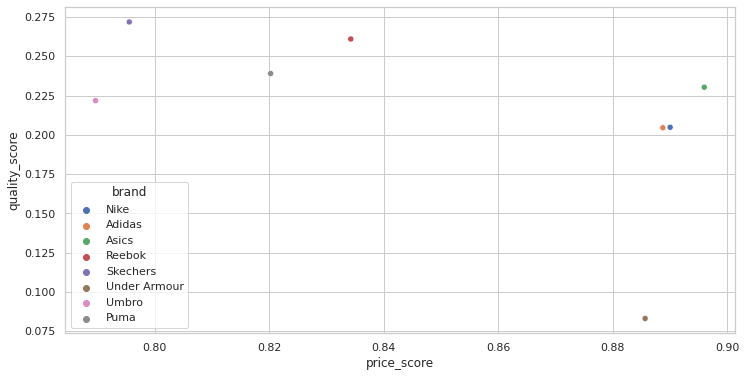

In [47]:
import seaborn as sns

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

sns.scatterplot(x="price_score", y="quality_score", hue="brand", data=sport_brands_df);

In [50]:
import plotly.express as px
fig = px.scatter(y=sport_brands_df['price_score'], x=sport_brands_df["quality_score"], color=sport_brands_df.brand)
fig.show()

## VADER Scores

Nos centraremos en el 'compound score' ya que es el que nos aporta una visión global del análisis del sentimiento de cada tweet.

Para simplificar el proceso, generamos una nueva columna del DataFrame que recoja este score para cada tweet.

In [51]:
brands_tweets.head()

,index,text,hashtags,brand_attribute,brand,token,blob_scores,vader_scores
0,0,nobody cares about nike in russia russia is al...,[],quality,nike,"[care, nike, russia, russia, adidas]",0.000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
1,1,ye green nike hoodie waala two weeks pehle put...,[],quality,nike,"[ye, green, nike, hoodie, waala, week, pehle, ...",-0.475,"{'neg': 0.136, 'neu': 0.741, 'pos': 0.123, 'co..."
2,2,nike okundaye also knowns nike twins seven sev...,"[#womengiant, #Documentwomen]",quality,nike,"[nike, okundaye, knowns, nike, twin, seven, se...",0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,day four of maxmadness air max month nike air ...,"[#maxmadness, #AirMaxMonth, #airmaxgang, #kotd...",quality,nike,"[day, maxmadness, air, max, month, nike, air, ...",0.750,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."
4,4,thank you sir,[],quality,nike,"[thank, sir]",0.000,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."


In [52]:
brands_tweets['compound_vader_score']  = brands_tweets['vader_scores'].apply(lambda score_dict: score_dict['compound'])

In [53]:
brands_tweets.head()

,index,text,hashtags,brand_attribute,brand,token,blob_scores,vader_scores,compound_vader_score
0,0,nobody cares about nike in russia russia is al...,[],quality,nike,"[care, nike, russia, russia, adidas]",0.000,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.4939
1,1,ye green nike hoodie waala two weeks pehle put...,[],quality,nike,"[ye, green, nike, hoodie, waala, week, pehle, ...",-0.475,"{'neg': 0.136, 'neu': 0.741, 'pos': 0.123, 'co...",-0.1280
2,2,nike okundaye also knowns nike twins seven sev...,"[#womengiant, #Documentwomen]",quality,nike,"[nike, okundaye, knowns, nike, twin, seven, se...",0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,3,day four of maxmadness air max month nike air ...,"[#maxmadness, #AirMaxMonth, #airmaxgang, #kotd...",quality,nike,"[day, maxmadness, air, max, month, nike, air, ...",0.750,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.7906
4,4,thank you sir,[],quality,nike,"[thank, sir]",0.000,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.3612


In [54]:
brands_tweets.blob_scores.mean()

0.1053805303017492

**Resultados Nike:**

In [55]:
vader_nike_price = brands_tweets[(brands_tweets['brand'] == 'nike') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [56]:
print('Precio Nike: ', vader_nike_price.compound_vader_score.mean())

Precio Nike:  0.1872288930084746


In [57]:
vader_nike_quality = brands_tweets[(brands_tweets['brand'] == 'nike') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [58]:
print('Calidad Nike: ', vader_nike_quality.compound_vader_score.mean())

Calidad Nike:  0.2550077126141553


**Resultados Adidas:**

In [59]:
vader_adidas_price = brands_tweets[(brands_tweets['brand'] == 'adidas') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [60]:
print('Precio Adidas: ', vader_adidas_price.compound_vader_score.mean())

Precio Adidas:  0.1888739222427929


In [61]:
vader_adidas_quality = brands_tweets[(brands_tweets['brand'] == 'adidas') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [62]:
print('Calidad Adidas: ', vader_adidas_quality.compound_vader_score.mean())

Calidad Adidas:  0.2557946335545565


**Resultados Asics:**

In [63]:
vader_asics_price = brands_tweets[(brands_tweets['brand'] == 'asics') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [64]:
print('Precio Asics: ', vader_asics_price.compound_vader_score.mean())

Precio Asics:  0.2600096573208723


In [65]:
vader_asics_quality = brands_tweets[(brands_tweets['brand'] == 'asics') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [66]:
print('Calidad Asics: ', vader_asics_quality.compound_vader_score.mean())

Calidad Asics:  0.38215905511811027


**Resultados Reebok:**

In [67]:
vader_reebok_price = brands_tweets[(brands_tweets['brand'] == 'reebok') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [68]:
print('Precio Reebok: ', vader_reebok_price.compound_vader_score.mean())

Precio Reebok:  0.3114349775784753


In [69]:
vader_reebok_quality = brands_tweets[(brands_tweets['brand'] == 'reebok') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [70]:
print('Calidad Reebok: ', vader_reebok_quality.compound_vader_score.mean())

Calidad Reebok:  0.39911614077669905


**Resultados Skechers:**

In [71]:
vader_skechers_price = brands_tweets[(brands_tweets['brand'] == 'skechers') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [72]:
print('Precio Skechers: ', vader_skechers_price.compound_vader_score.mean())

Precio Skechers:  0.41719166666666674


In [73]:
vader_skechers_quality = brands_tweets[(brands_tweets['brand'] == 'skechers') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [74]:
print('Calidad Skechers: ', vader_skechers_quality.compound_vader_score.mean())

Calidad Skechers:  0.4815434474616293


**Resultados Under Armour:**

In [75]:
vader_under_armour_price = brands_tweets[(brands_tweets['brand'] == 'under armour') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [76]:
print('Precio Under Armour: ', vader_under_armour_price.compound_vader_score.mean())

Precio Under Armour:  0.19087424242424247


In [77]:
vader_under_armour_quality = brands_tweets[(brands_tweets['brand'] == 'under armour') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [78]:
print('Calidad Under Armour: ', vader_under_armour_quality.compound_vader_score.mean())

Calidad Under Armour:  0.19097359307359305


**Resultados Umbro:**

In [79]:
vader_umbro_price = brands_tweets[(brands_tweets['brand'] == 'umbro') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [80]:
print('Precio Umbro: ', vader_umbro_price.compound_vader_score.mean())

Precio Umbro:  0.40966111111111125


In [81]:
vader_umbro_quality = brands_tweets[(brands_tweets['brand'] == 'umbro') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [82]:
print('Calidad Umbro: ', vader_umbro_quality.compound_vader_score.mean())

Calidad Umbro:  0.32198456973293765


**Resultados Puma:**

In [83]:
vader_puma_price = brands_tweets[(brands_tweets['brand'] == 'puma') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [84]:
print('Precio Puma: ', vader_puma_price.compound_vader_score.mean())

Precio Puma:  0.32757731958762887


In [85]:
vader_puma_quality = brands_tweets[(brands_tweets['brand'] == 'puma') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [86]:
print('Calidad Puma: ', vader_puma_quality.compound_vader_score.mean())

Calidad Puma:  0.28567833403449727


### Visualización de Resultados.


**Creamos la tabla a partir de la cual generamos el gráfico (preparamos los datos).**

In [87]:
sport_brands_vader = [
    
{'brand':'Nike', 'price_score': 1-vader_nike_price.compound_vader_score.mean(), 'quality_score': vader_nike_quality.compound_vader_score.mean()},
{'brand':'Adidas', 'price_score': 1-vader_adidas_price.compound_vader_score.mean(), 'quality_score': vader_adidas_quality.compound_vader_score.mean()},
{'brand':'Asics', 'price_score': 1-vader_asics_price.compound_vader_score.mean(), 'quality_score': vader_asics_quality.compound_vader_score.mean()},
{'brand':'Reebok', 'price_score': 1-vader_reebok_price.compound_vader_score.mean(), 'quality_score': vader_reebok_quality.compound_vader_score.mean()},
{'brand':'Skechers', 'price_score': 1-vader_skechers_price.compound_vader_score.mean(), 'quality_score': vader_skechers_quality.compound_vader_score.mean()},
{'brand':'Under Armour', 'price_score': 1-vader_under_armour_price.compound_vader_score.mean(), 'quality_score': vader_under_armour_quality.compound_vader_score.mean()},
{'brand':'Umbro', 'price_score': 1-vader_umbro_price.compound_vader_score.mean(), 'quality_score': vader_umbro_quality.compound_vader_score.mean()},
{'brand':'Puma', 'price_score': 1-vader_puma_price.compound_vader_score.mean(), 'quality_score': vader_puma_quality.compound_vader_score.mean()}
]

In [88]:
sport_brands_vader_df = pd.DataFrame(sport_brands_vader)

sport_brands_vader_df

,brand,price_score,quality_score
0,Nike,0.812771,0.255008
1,Adidas,0.811126,0.255795
2,Asics,0.739990,0.382159
3,Reebok,0.688565,0.399116
4,Skechers,0.582808,0.481543
5,Under Armour,0.809126,0.190974
6,Umbro,0.590339,0.321985
7,Puma,0.672423,0.285678


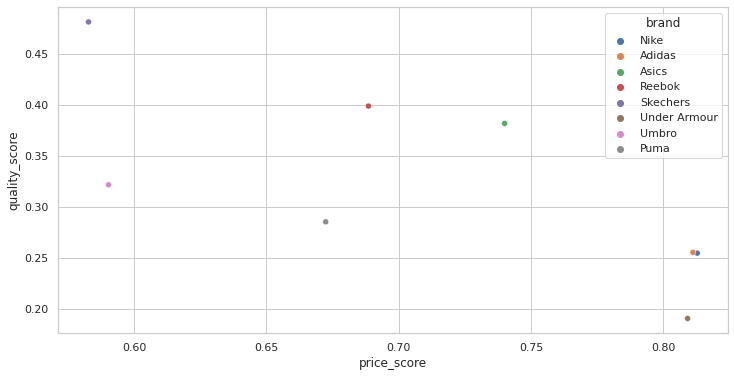

In [89]:
import seaborn as sns

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

sns.scatterplot(x="price_score", y="quality_score", hue="brand", data=sport_brands_vader_df);

In [90]:
import plotly.express as px
fig = px.scatter(sport_brands_vader_df, y='price_score', x="quality_score",
                 color='brand',
                 labels={
                     "price_score": "Percepción del Precio",
                     "quality_score": "Calidad Percibida",
                     "brand": "Marcas:"})
fig.update_layout(font=dict(size=20), yaxis_showticklabels=False, xaxis_showticklabels=False)

#legend_title_font_color="RebeccaPurple")

fig.show()

fig.write_image("graphs/sports_equipment.png")